In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open('embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [3]:
embeddings = np.array(x)

In [4]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(embeddings[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [8]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def error(K, m, D):
    """Return average distances between data in one cluster, averaged over all clusters"""
    E = 0
    for k in range(K):
        i = np.where(m == k)[0]  # indices of datapoints belonging to class k
        E += np.mean(D[np.meshgrid(i, i)])
    return E / K

def eqsc(X, K=None, G=None):
    """Equal-size clustering based on data exchanges between pairs of clusters"""
    np.random.seed(0)  # repeatability
    N, n = X.shape
    if G is None and K is not None:
        G = N // K  # group size
    elif K is None and G is not None:
        K = N // G  # number of clusters
    else:
        raise Exception('Must specify either K or G')

    D = squareform(pdist(X))  # distance matrix
    m = np.random.permutation(N) % K  # initial membership
    E = error(K, m, D)

    t = 1
    while True:
        E_p = E
        for a in range(N):  # systematically
            for b in range(a):
                m[a], m[b] = m[b], m[a]  # exchange membership
                E_t = error(K, m, D)
                if E_t < E:
                    E = E_t
                    print("{}: {}<->{} E={}".format(t, a, b, E))
                else:
                    m[a], m[b] = m[b], m[a]  # put them back
        if E_p == E:
            break
        t += 1

    # Visualization
    fig, ax = plt.subplots()
    patches = []
    for k in range(K):
        i = np.where(m == k)[0]  # indices of datapoints belonging to class k
        x = X[i]
        patches.append(Polygon(x[:,:2], True))
        u = np.mean(x, 0)
        plt.text(u[0], u[1], str(k))
    p = PatchCollection(patches, alpha=0.5)
    ax.add_collection(p)
    plt.show()

1: 12<->4 E=21.75655526148108
1: 27<->19 E=21.756555261481076


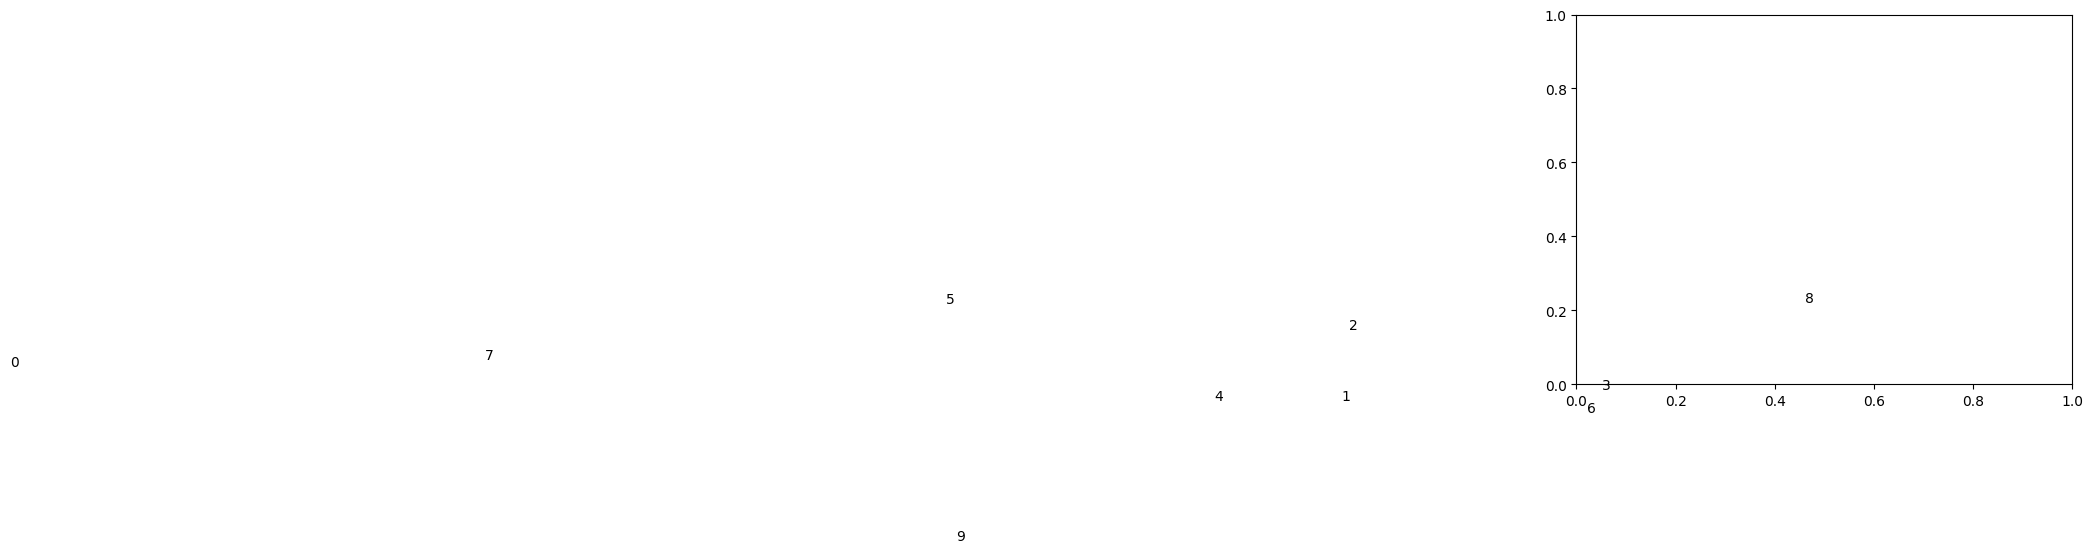

In [9]:
centroids = np.array(centroids)
clusters = eqsc(centroids, K=10)

In [65]:
print(clusters.shape)
print(clusters)
print(np.unique(clusters, return_counts=True))

(100,)
[5 5 3 7 7 4 6 6 8 3 4 3 0 8 6 7 4 0 6 7 3 7 4 0 6 4 5 1 4 2 1 7 3 2 9 3 3
 8 9 0 3 8 9 9 5 5 3 2 8 0 9 2 2 5 6 7 2 5 8 2 0 4 6 9 7 9 7 1 0 0 6 0 1 1
 1 7 0 1 5 6 9 8 2 5 4 8 4 4 9 8 8 1 6 1 2 1 2 9 3 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


In [66]:
reverse = {}
for i, x in enumerate(clusters):
    reverse[i] = clusters[i]

print(reverse)

{0: 5, 1: 5, 2: 3, 3: 7, 4: 7, 5: 4, 6: 6, 7: 6, 8: 8, 9: 3, 10: 4, 11: 3, 12: 0, 13: 8, 14: 6, 15: 7, 16: 4, 17: 0, 18: 6, 19: 7, 20: 3, 21: 7, 22: 4, 23: 0, 24: 6, 25: 4, 26: 5, 27: 1, 28: 4, 29: 2, 30: 1, 31: 7, 32: 3, 33: 2, 34: 9, 35: 3, 36: 3, 37: 8, 38: 9, 39: 0, 40: 3, 41: 8, 42: 9, 43: 9, 44: 5, 45: 5, 46: 3, 47: 2, 48: 8, 49: 0, 50: 9, 51: 2, 52: 2, 53: 5, 54: 6, 55: 7, 56: 2, 57: 5, 58: 8, 59: 2, 60: 0, 61: 4, 62: 6, 63: 9, 64: 7, 65: 9, 66: 7, 67: 1, 68: 0, 69: 0, 70: 6, 71: 0, 72: 1, 73: 1, 74: 1, 75: 7, 76: 0, 77: 1, 78: 5, 79: 6, 80: 9, 81: 8, 82: 2, 83: 5, 84: 4, 85: 8, 86: 4, 87: 4, 88: 9, 89: 8, 90: 8, 91: 1, 92: 6, 93: 1, 94: 2, 95: 1, 96: 2, 97: 9, 98: 3, 99: 5}


In [67]:
parents_centroids_tmp = {}
parents_centroids = []


# compute the centroid for each parent class

print(clusters == 0)


for x in range(10):

    parents_centroids_tmp[x] = np.mean(centroids[clusters == x], axis=0)
    parents_centroids.append(parents_centroids_tmp[x])

parents_centroids = np.array(parents_centroids)

print(parents_centroids_tmp[0])

[False False False False False False False False False False False False
  True False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False  True  True False  True
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[-3.45985293e+00 -1.48927137e-01  1.42257676e-01  1.02713823e-01
 -7.37985671e-01  5.23586392e-01  1.52888048e+00  1.28275067e-01
 -2.09977701e-01 -1.43495962e-01 -7.03446090e-01 -1.68664768e-01
 -3.04117084e-01 -7.58550763e-01  7.76736587e-02 -8.03327411e-02
 -3.88208985e-01 -8.58488455e-02  6.20942414e-01 -1.30580753e-01
 -2.64462620e-01 -1.92462765e-02 -5.33664878e-03 -1.59573311e-03


[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
0.10457346350832267


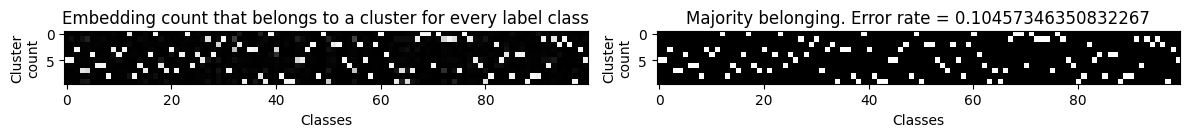

In [68]:
def plot_stuff(embeddings, y):
    # Your data and operations here
    a = np.zeros((10,100))

    for i, x in enumerate(embeddings):
        distances = np.linalg.norm(centroids - x, axis=1)
        first_index = np.argsort(distances)[0]    
        a[reverse[first_index]][y[i]] += 1
        
    ## majority voting for each class
    b = np.argmax(a, axis=0)

    c = np.zeros((10,100))
    for x in range(100):    
        c[b[x]][x] = 1

    print(np.sum(c, axis=1))

    false_negative = np.ma.array(a,mask=c)
    sum_fn = np.sum(false_negative)
    print(sum_fn/y.shape[0])

    # Start by creating a figure
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    # First subplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    plt.xlabel("Classes")
    plt.ylabel("Cluster\ncount")
    plt.title("Embedding count that belongs to a cluster for every label class")
    plt.imshow(a, cmap='Greys_r')

    # Second subplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    plt.xlabel("Classes")
    plt.ylabel("Cluster\ncount")
    plt.title("Majority belonging. Error rate = " + str(sum_fn/y.shape[0]))
    plt.imshow(c, cmap='Greys_r')

    # Display the figure
    plt.tight_layout()  # This adjusts subplots to fit into the figure area.
    plt.show()

plot_stuff(embeddings, y)

In [69]:
with open('embeddings_all_l0.9_test.pkl', 'rb') as file:
    data = pickle.load(file)

x_test = data["outputs"].cpu().numpy()
y_test = data["labels"].cpu().numpy()
print(x_test.shape)
print(y_test.shape)

embeddings_test = np.array(x_test)
y_test = np.array(y_test)

(10000, 344)
(10000,)


[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
0.1674


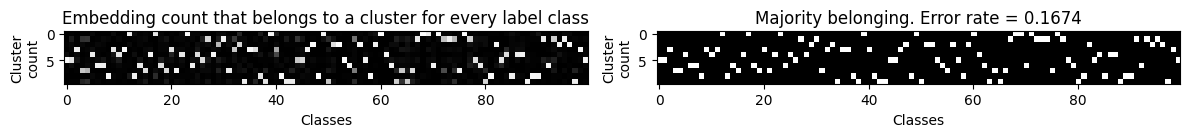

In [70]:
plot_stuff(embeddings_test, y_test)

In [71]:
print(clusters==0)

n = np.arange(100)[clusters==0]
print(n)

[False False False False False False False False False False False False
  True False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False  True  True False  True
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False]
[12 17 23 39 49 60 68 69 71 76]


In [72]:
#parents_centroids = 

In [73]:
def do_it(i):

    n = np.arange(100)[clusters==i]

    embeddings_child = []
    labels_child = []

    for i, x in enumerate(embeddings_test):
        distances = np.linalg.norm(centroids - x, axis=1)
        first_index = np.argsort(distances)[0]    
        if(first_index in n):
            #print(first_index, y_test[i])
            embeddings_child.append(x)
            labels_child.append(y_test[i])

    centroids_child = []
    centroids_np = np.array(centroids)
    centroids_child = centroids_np[n]  

    curr_mapping = {}

    for i, x in enumerate(n):
        curr_mapping[x] = i

    at = np.zeros((10,11))

    for i, x in enumerate(embeddings_child):     
        distances = np.linalg.norm(centroids_child - x, axis=1)
        predicted = np.argsort(distances)[0]
        real = labels_child[i]   
       # print(real, predicted) 
        if(real not in n):
            real_mapped = 10
        else:
            real_mapped = curr_mapping[real]    

        at[predicted][real_mapped] += 1

    return at


at = do_it(2)

In [74]:
list_all = []

for i in range(10):
    at = do_it(i)
    list_all.append(at)

list_all = np.array(list_all)

226.0
717.0
975.0
1337.0
1638.0
2009.0
2320.0
2662.0
2904.0
3244.0
final test accuracy:  0.6756


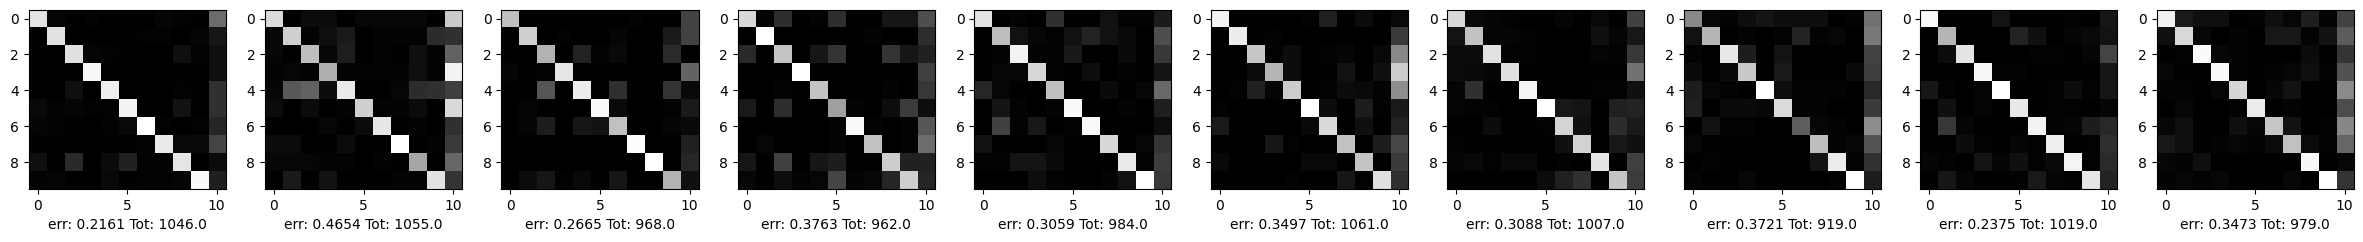

In [75]:

# plot n different plots

fig, axs = plt.subplots(1,10)  # 1 row, 2 columns, first plot
fig.set_figheight(10)

fig.set_figwidth(30)

tot_negatives = 0

for i in range(10):    

    true_pos = sum(np.diagonal(list_all[i]))
    tot = np.sum(list_all[i])
    false_negative = tot - true_pos

    ## majority voting for each class
    bt = np.argmax(list_all[i], axis=0)

    ct = np.zeros((10,11), dtype=np.bool_)
    for x in range(10):    
        ct[bt[x]][x] = True   

    # axs[1][i].set_xlabel("False negatives: {} ".format(false_negative))
    # axs[1][i].imshow(ct, cmap='Greys_r')

    tot_negatives += false_negative
    print(tot_negatives)

    axs[i].set_xlabel("err: {:.4f} Tot: {}".format(false_negative/tot, tot))
    axs[i].imshow(list_all[i], cmap='Greys_r')

print("final test accuracy: ", 1-(tot_negatives/10000) )

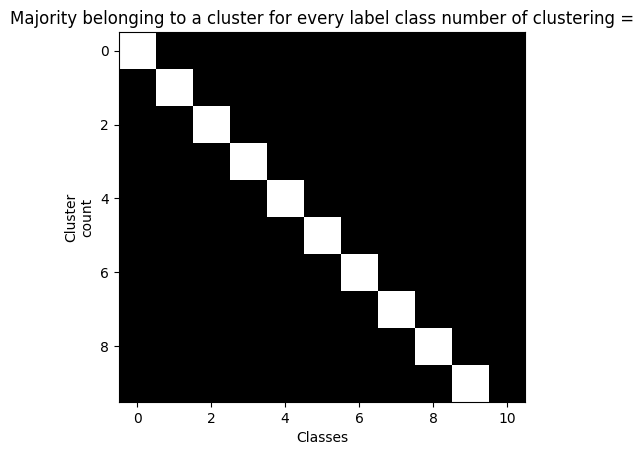

In [77]:
## majority voting for each class
bt = np.argmax(at, axis=0)

ct = np.zeros((10,11))
for x in range(10):    
    ct[bt[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(ct, cmap='Greys_r')

In [78]:
print(centroids)

[[ 1.2200778   0.35155034  0.14543827 ...  1.8693928  -1.746993
   0.43573877]
 [ 1.6846068  -1.4774454   0.2211549  ... -0.2947296   0.09786692
   0.371074  ]
 [ 0.5319949   0.40697405  0.14861241 ...  1.5530319  -1.6535947
  -0.58409303]
 ...
 [-2.2031183  -0.00956561  0.19221461 ... -1.1112419   0.24671137
  -1.0315042 ]
 [-2.8705158   0.06887716  0.19313903 ...  1.9522929  -0.9103775
  -0.7863662 ]
 [ 1.711165   -1.1348513   0.19063242 ...  1.0703391  -0.47288743
   0.18520766]]


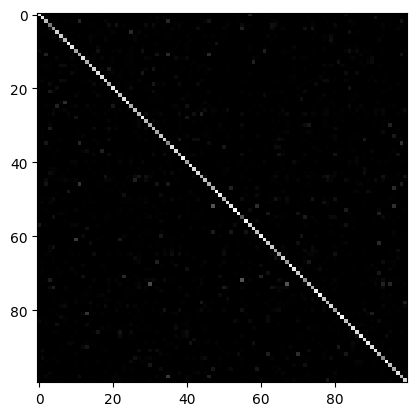

In [79]:

a = np.zeros((100,100))

for i, x in enumerate(embeddings_test):
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]    
    a[first_index][y_test[i]] += 1

plt.imshow(a, cmap='Greys_r')



In [80]:
true_pos = sum(np.diagonal(a))
tot = np.sum(a)
false_negative = tot - true_pos

print(false_negative/tot)
print(1-false_negative/tot)

0.3244
0.6756
